# Perceptron

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from d2l.tensorflow import config

config.setup()

In [2]:
tf.random.set_seed(1)

## Generate fake separable data

In [3]:
def get_fake(samples, dimensions, epsilon):
    wfake = tf.random.normal(shape=(dimensions,))    # fake weights vector
    bfake = tf.random.normal(shape=(1,))             # fake bias
    wfake = wfake / tf.norm(wfake)                  # rescale weights to units

    # make linearly separable data by choosing labels accordingly
    X = tf.Variable(tf.zeros(shape=(samples, dimensions)))
    y = tf.Variable(tf.zeros(shape=(samples,)))

    i = 0
    while i < samples:
        tmp = tf.random.normal(shape=(1, dimensions))
        margin = tf.tensordot(tmp, wfake, axes=1) + bfake
        if tf.norm(tmp) < 3 and abs(margin) > epsilon:
            X.scatter_nd_update([i], tmp)
            y.scatter_nd_update([i], [1 if margin > 0 else -1])
            i += 1
    
    return X, y


## Plot the data

In [4]:
def plot_data(X, y):
    for (feature, label) in zip(X.numpy(), y.numpy()):
        if label == 1:
            plt.scatter(feature[0], feature[1], color='r')
        else:
            plt.scatter(feature[0], feature[1], color='b')

def plot_score(W, b):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = np.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:, :, 0] = np.array(xx)
    zz[:, :, 1] = np.array(yy)
    vv = np.dot(zz, W.numpy()) + b.numpy()
    CS = plt.contour(xgrid, ygrid, vv)
    plt.clabel(CS, inline=1, fontsize=10)

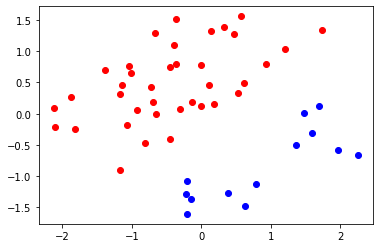

In [5]:
X, y = get_fake(50, 2, 0.3)
plot_data(X, y)
plt.show()

# The perceptron algorithm

In [6]:
def perceptron(W, b, X, y):
    if y * (tf.tensordot(W, X, axes=1) + b) <= 0:
        W.assign_add(y * X)
        b.assign_add([y])
        return 1
    return 0

Encountered an eror and updated parameters.
data: [-0.45701224 -0.40686727], labels: 1.0
weight: [-0.45701224 -0.40686727], bias: [1.]


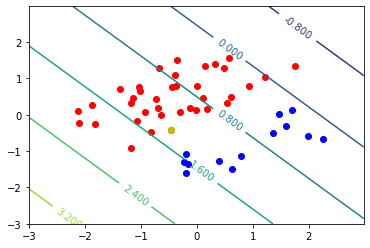

Encountered an eror and updated parameters.
data: [1.6940167  0.11969317], labels: -1.0
weight: [-2.1510289 -0.5265604], bias: [0.]


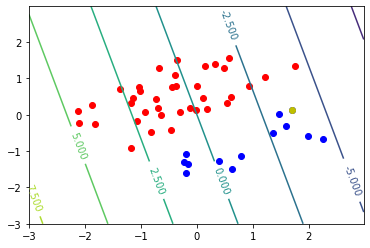

Encountered an eror and updated parameters.
data: [0.6118191  0.49197587], labels: 1.0
weight: [-1.5392098  -0.03458455], bias: [1.]


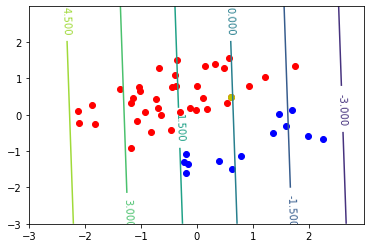

Encountered an eror and updated parameters.
data: [1.7451856 1.3414903], labels: 1.0
weight: [0.20597577 1.3069057 ], bias: [2.]


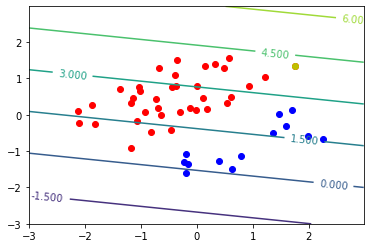

Encountered an eror and updated parameters.
data: [-0.19985001 -1.0840513 ], labels: -1.0
weight: [0.4058258 2.3909569], bias: [1.]


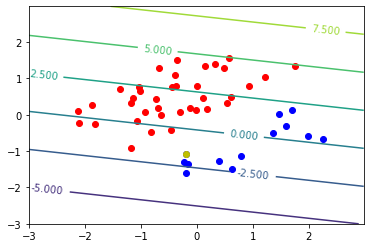

Encountered an eror and updated parameters.
data: [ 1.9771382  -0.57999754], labels: -1.0
weight: [-1.5713124  2.9709544], bias: [0.]


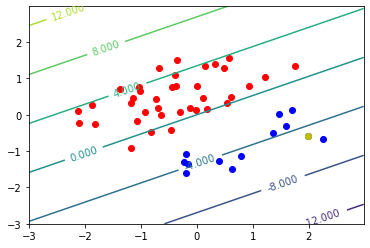

Encountered an eror and updated parameters.
data: [-0.81752163 -0.4762779 ], labels: 1.0
weight: [-2.388834   2.4946766], bias: [1.]


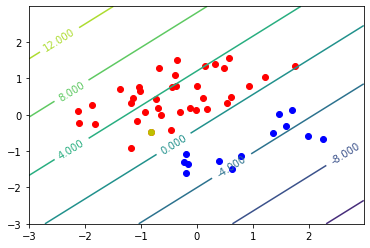

In [7]:
W = tf.Variable(tf.zeros(shape=(2,)))
b = tf.Variable(tf.zeros(shape=(1,)))

for (feature, label) in zip(X.numpy(), y.numpy()):
    res = perceptron(W, b, feature, label)
    if res == 1:
        print('Encountered an eror and updated parameters.')
        print('data: {}, labels: {}'.format(feature, label))
        print('weight: {}, bias: {}'.format(W.numpy(), b.numpy()))
        plot_score(W, b)
        plot_data(X, y)
        plt.scatter(feature[0], feature[1], color='y')
        plt.show()